<a href="https://colab.research.google.com/github/Kairos1708/Se-ales_y_Sistemas/blob/main/Parcial_3_SYS_JEMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Parcial 3 Señales y Sistemas*** \\
***Juan Esteban Montes Salazar - 1193524007*** \\
***Andrés Marino Alvaréz Meza***



# Punto 1

Encuentre la función de transferencia que caracteriza el sistema masa, resorte, amortiguador, presentado en la siguiente Figura (asuma condiciones iniciales cero):

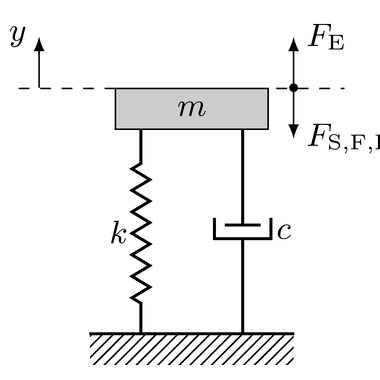

Posteriormente, encuentre el sistema equivalente del modelo masa, resorte, amortguador, a partir del siguiente circuito eléctrico:

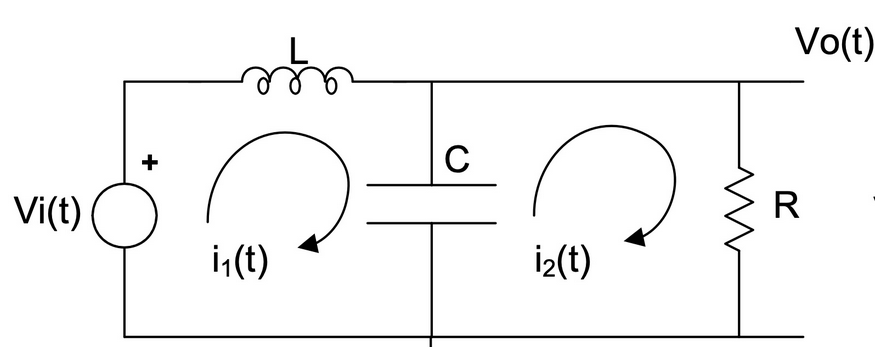

##  Modelamos la función de transferencia

Modelamos el sistema masa, resorte a partir del principo de conservación de fuerzas: \\

$$F_S(t) + F_F(t) + F_I(t) = F_E(t)$$

dónde: $$ F_S(t) = ky(t) ; F_F(t)=c\frac{dy(t)}{dt}; F_I(t)=m\frac{d^{2}y(t)}{dt}  $$ \\

Tenemos: $$ m\frac{d^{2}y(t)}{dt} + c\frac{dy(t)}{dt} + ky(t) = F_E(t) = x(t)$$

Aplicando la transformada de Laplace tenemos: $$ms^{2}Y(s) + csY(s) + kY(s) = X(s)$$

Se obtiene la función de transferencia: $$ H(s) = \frac{Y(s)}{X(s)} = \frac{1}{ms^{2} + cs + k} $$

Para el circuito eléctrico tenemos: $$V_i(s)=L_sI_1(s) + (I_1(s) - I_2(s)) \frac{1}{cs}$$ \\

$$(I_1(s) - I_2(s)) \frac{1}{cs} + I_2(s)R = 0$$ \\

$$V_o(s) = I_2(s)R $$

Despejamos $$ I_1(s) $$ en función de $$ I_2(s) $$: $$\frac{1}{cs}I_2(s) - \frac{1}{cs}I_1(s) + I_2(s)R$$

$$I_1(s) = I_2(s)(1 + CRs)$$

Reemplazamos: $$V_i(s) = L_sI_2(s)(1 + CRs) + (I_2(s)(1 + CRs) - I_2(s))\frac{1}{cs}  $$ \\


$$V_i(s) = L_sI_2(s) + CRLs^{2}I_2(s) + I_2(s)\frac{1}{cs} + I_2(s)R - I_2(s)\frac{1}{cs} $$ \\

$$V_i(s) = I_2(s)(CRLs^{2} + Ls + R) $$ \\


$$\frac{I_2(s)}{V_i(s)} = \frac{1}{CRLs^{2} + Ls + R } $$ \\

$$\frac{RI_2(s)}{V_i(s)} = \frac{V_o(s}{V_i(s)} =\frac{R}{CRLs^{2} + Ls + R } $$ \\

Finalmente tenemos: $$H(s) = \frac{V_o(s}{V_i(s)} = \frac{1}{CLs^{2} + \frac{L}{R}s + 1 } $$

Finalmente se tiene la siguiente equivalencia: $$ CL = m; L/R = c; 1 = k $$








Finalmente, proponga unos valores de ***m***, ***k*** y ***c*** y sus equivalente ***R***, ***L*** y ***C***  para simular un sistema subamortiguado,
sobreamortiguado, y de amortiguamiento crÍtico (determine
el factor de amortiguamiento, la frecuencia natural amorti-
guada, la frecuencia natural no amortiguada, el tiempo pico,
tiempo de levantamiento y el tiempo de establecimiento en
cada caso). Para cada caso, grafique el diagrama de polos y
ceros, el diagrama de Bode, la respuesta impulso, respuesta
escalÓn y respuesta rampa. Repita el proceso para modo lazo
cerrado.

In [1]:
!pip install sympy --upgrade #actualizar sympy para usar módulo de control

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym
sym.init_printing()
#definir variables
t, m, c, k = sym.symbols('t m c k', real=True,positive=True)
s = sym.symbols('s', complex=True)

In [3]:
#forma canónica del slit
a2 = m #CL en circuito equivalente
a1 = c #L/R en circuito equivalente
ao = k # 1 en circuito equivalente

Ko = 1/ao #ganancia circuito forma canónica
wn = sym.sqrt(ao/a2)
xi = a1/(2*sym.sqrt(ao*a2))
#función de transferencia
H = Ko*(wn**2/(s**2+2*xi*wn*s+wn**2))
H


       1        
────────────────
  ⎛c⋅s   k    2⎞
m⋅⎜─── + ─ + s ⎟
  ⎝ m    m     ⎠

In [4]:
#calcular polos
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1

                      _____________
                     ╱      2      
                    ╱      c       
        1.0⋅ⅈ⋅√k⋅  ╱   - ───── + 1 
   c             ╲╱      4⋅k⋅m     
- ─── + ───────────────────────────
  2⋅m                √m            

# Para sistema subamortiguado

$$0 <\xi< 1$$ \\

$$0 <\frac{a_1}{{2}{\sqrt{a_0*a_2}}}< 1$$ \\

$$0 <\frac{c}{{2}{\sqrt{k*m}}}< 1$$ \\

Se asumen:
$$ k=1 $$ \\
$$ c=1= \frac{L}{R}$$ \\

$$L=1,R=1$$ \\

$$ m=4= CL$$ \\
$$ C=4$$ \\

Y se tiene que:
$$\xi=\frac{1}{4}=0.25$$




**Frecuencia natural no amortiguada**

Se tiene:

$$ \omega_n^{2}=\frac{a_0}{a_2}$$ \\
$$ \omega_n=\sqrt{\frac{a_0}{a_2}}$$ \\
$$ \omega_n=\sqrt{\frac{k}{m}}$$ \\
$$ \omega_n=\sqrt{\frac{1}{4}}$$ \\
$$ \omega_n=0.5$$ \\

***Frecuencia natural amortiguada*** \\
Se tiene:

$$ \omega_d=\omega_n\sqrt{1-\xi^{2}}$$ \\
$$ \omega_d=0.5\sqrt{1-0.25^{2}}$$ \\
$$ \omega_d=0.48$$ \\



***Tiempo pico*** \\
Se tiene:

$$t_p=\frac{\pi}{\omega_n\sqrt{1-\xi^{2}}}$$ \\
$$t_p=\frac{\pi}{0.5\sqrt{1-0.25^{2}}}$$ \\
$$t_p=6.49s$$

***Tiempo de establecimiento*** \\
Se tiene:

$$t_s=\frac{3}{\xi\omega_n}$$ \\
$$t_s=\frac{3}{0.25\cdot0.5}$$ \\
$$t_s=24s$$ \\



***Tiempo de levantamiento*** \\
Se tiene:

$$t_u=t_p-0.1t_s$$ \\
$$t_u=6.49-0.1\cdot24$$ \\
$$t_u=4.09s$$

In [5]:
#Reemplazando los valores
mck = {m: 4.0, c: 1.0, k: 1.0}
mck

{c: 1.0, k: 1.0, m: 4.0}

***Polos y ceros***

In [6]:
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -0.125 + 0.484122918275927*I
p2= -0.125 - 0.484122918275927*I
xi= 0.250000000000000
omega_n= 0.500000000000000


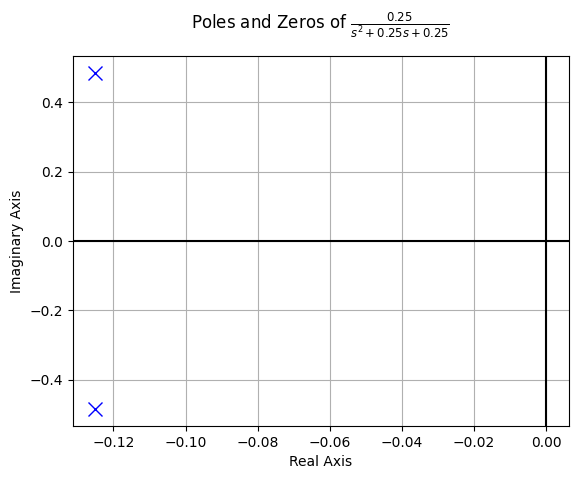

In [7]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)



***Diagrama de Bode***

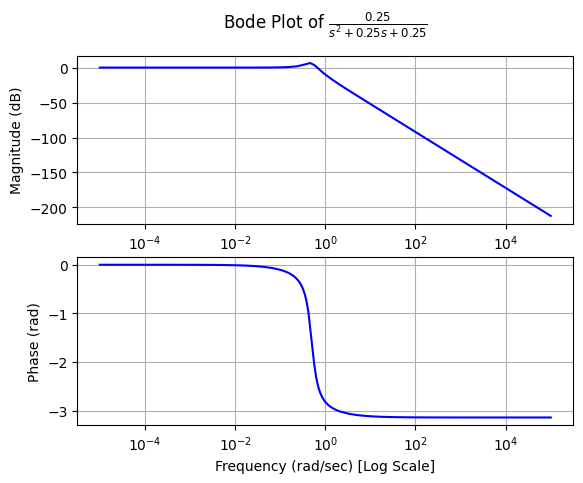

In [8]:
bode_plot(tf1)

***Respuesta impulso***

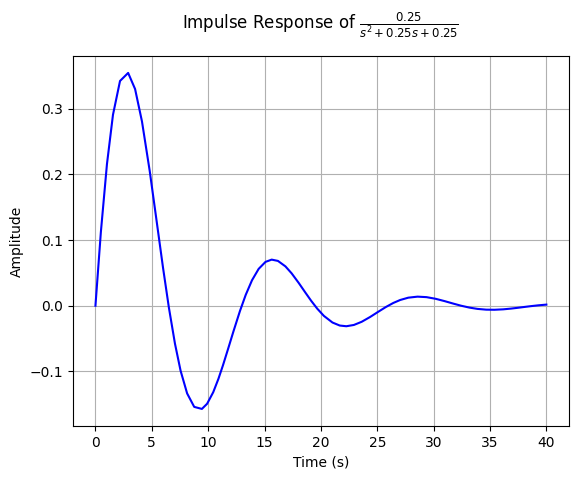

In [9]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

***Respuesta escalón***

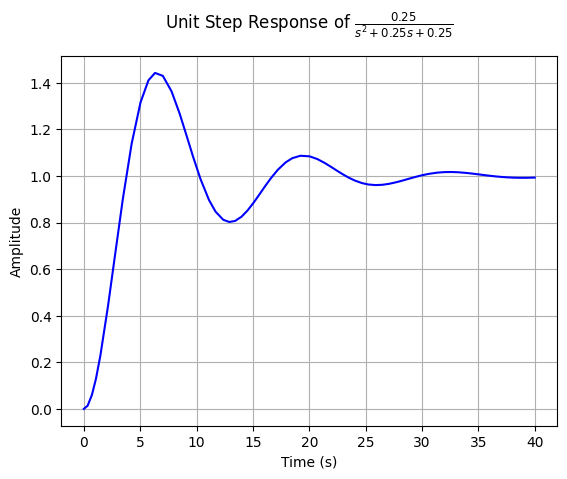

In [10]:
step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

***Respuest rampa***

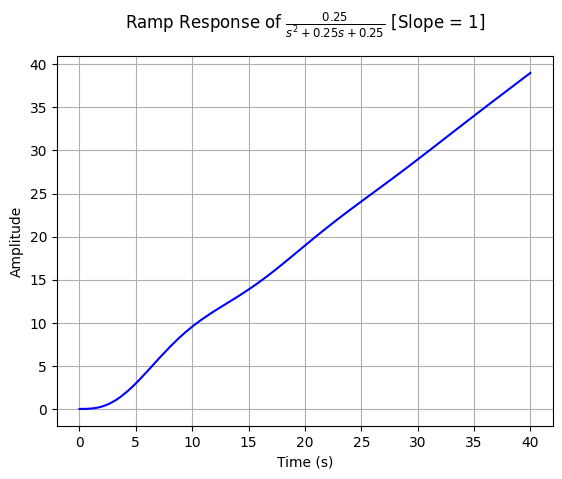

In [11]:
import sympy.physics.control as control
control.ramp_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

#Para sistema sobreamortiguado


$$\xi> 1$$ \\

$$ \frac{a_1}{{2}{\sqrt{a_0*a_2}}}> 1$$ \\

$$ \frac{c}{{2}{\sqrt{k*m}}}> 1$$ \\

Se asumen:

$$ c=4= \frac{L}{R}$$ \\

$$L=1,R=\frac{1}{4}$$ \\

$$k=1$$ \\
$$ m=2= CL$$ \\
$$ C=2$$ \\

Y se tiene que:
$$\xi=\sqrt{2}=1.41$$

**Frecuencia natural no amortiguada**

Se tiene:

$$ \omega_n^{2}=\frac{a_0}{a_2}$$ \\
$$ \omega_n=\sqrt{\frac{a_0}{a_2}}$$ \\
$$ \omega_n=\sqrt{\frac{k}{m}}$$ \\
$$ \omega_n=\sqrt{\frac{1}{2}}$$ \\
$$ \omega_n=0.7$$ \\

***Frecuencia natural amortiguada*** \\
Se tiene:

$$ \omega_d=\omega_n\sqrt{1-\xi^{2}}$$ \\
$$ \omega_d=0.7\sqrt{1-1.41^{2}}$$ \\
$$ \omega_d=0.69\cdot i$$ \\

***Tiempo pico*** \\
Se tiene:

$$t_p=\frac{\pi}{\omega_n\sqrt{1-\xi^{2}}}$$ \\
$$t_p=\frac{\pi}{0.7\sqrt{1-1.41^{2}}}$$ \\
$$t_p=5.51\cdot i s$$

***Tiempo de establecimiento*** \\
Se tiene:

$$t_s=\frac{3}{\xi\omega_n}$$ \\
$$t_s=\frac{3}{1.41\cdot0.7}$$ \\
$$t_s=3.03s$$ \\

***Tiempo de levantamiento*** \\
Se tiene:

$$t_u=t_p-0.1t_s$$ \\
$$t_u=(5.51\cdot i)-(0.1\cdot3.03)$$ \\
$$t_u=5.207\cdot is$$

In [12]:
#Reemplazando los valores
mck = {m: 2.0, c: 4.0, k: 1.0}
mck

{c: 4.0, k: 1.0, m: 2.0}

In [13]:
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -1.70710678118655
p2= -0.292893218813452
xi= 1.41421356237310
omega_n= 0.707106781186548


***Polos y ceros***

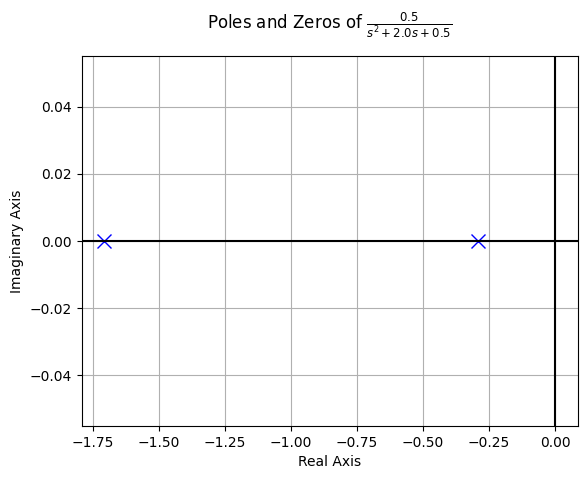

In [14]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)


***Diagrama de Bode***

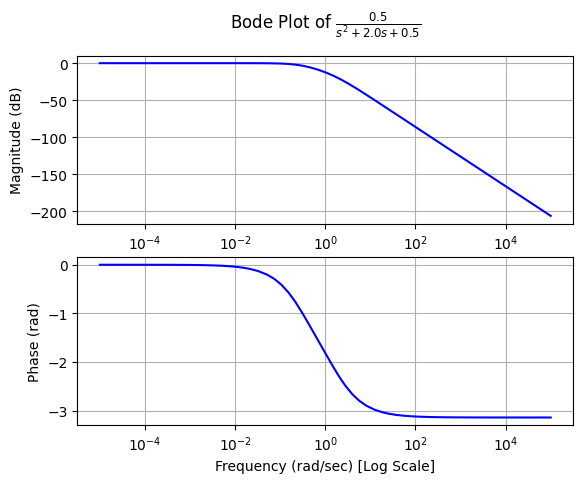

In [15]:
bode_plot(tf1)

***Respuesta impulso***

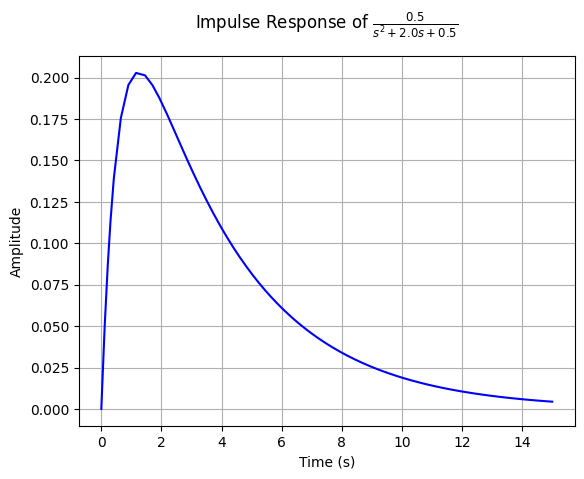

In [16]:
impulse_response_plot(tf1,upper_limit=15/(xi.subs(mck)*wn.subs(mck)))

***Respuesta escalón***

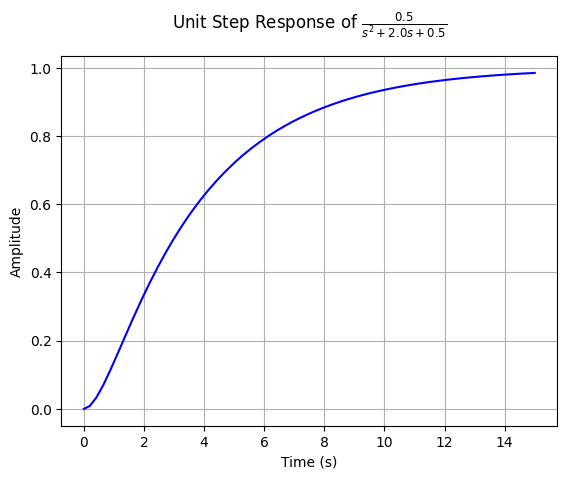

In [17]:
step_response_plot(tf1,upper_limit=15/(xi.subs(mck)*wn.subs(mck)))

***Respuesta rampa***

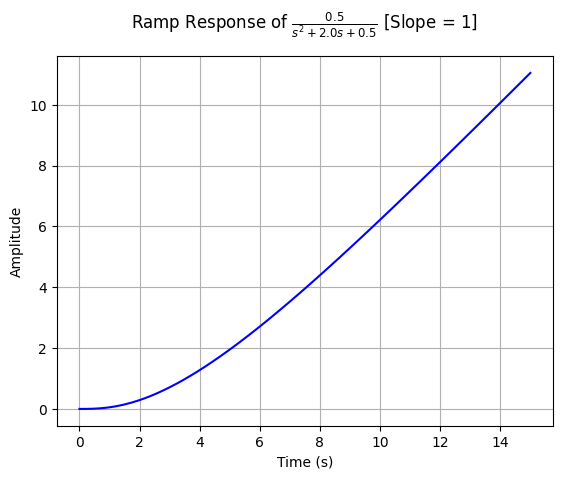

In [18]:
import sympy.physics.control as control
control.ramp_response_plot(tf1,upper_limit=15/(xi.subs(mck)*wn.subs(mck)))

#Para sistema críticamente amortiguado


$$ \xi= 1$$ \\

$$ \frac{a_1}{{2}{\sqrt{a_0*a_2}}}= 1$$ \\

$$ \frac{c}{{2}{\sqrt{k*m}}}= 1$$ \\

Se asumen:

$$ c=2= \frac{L}{R}$$ \\

$$L=\frac{1}{2},R=\frac{1}{4}$$ \\

$$k=1$$ \\
$$ m=1= CL$$ \\
$$ C=2$$ \\

Y se tiene que:
$$\xi=1$$

**Frecuencia natural no amortiguada**

Se tiene:

$$ \omega_n^{2}=\frac{a_0}{a_2}$$ \\
$$ \omega_n=\sqrt{\frac{a_0}{a_2}}$$ \\
$$ \omega_n=\sqrt{\frac{k}{m}}$$ \\
$$ \omega_n=\sqrt{\frac{1}{1}}$$ \\
$$ \omega_n=1$$ \\

***Frecuencia natural amortiguada*** \\
Se tiene:

$$ \omega_d=\omega_n\sqrt{1-\xi^{2}}$$ \\
$$ \omega_d=1\sqrt{1-1^{2}}$$ \\
$$ \omega_d=1$$ \\

***Tiempo pico*** \\
Se tiene:

$$t_p=\frac{\pi}{\omega_n\sqrt{1-\xi^{2}}}$$ \\
$$t_p=\frac{\pi}{1\sqrt{1-1^{2}}}$$ \\
$$t_p=\pi s$$
$$t_p=3.14 s$$

***Tiempo de establecimiento*** \\
Se tiene:

$$t_s=\frac{3}{\xi\omega_n}$$ \\
$$t_s=\frac{3}{1\cdot1}$$ \\
$$t_s=3s$$ \\

***Tiempo de levantamiento*** \\
Se tiene:

$$t_u=t_p-0.1t_s$$ \\
$$t_u=3.14-(0.1\cdot3)$$ \\
$$t_u=0.942s$$

In [19]:
#Reemplazando los valores
mck = {m: 1.0, c: 2.0, k: 1.0}
mck

{c: 2.0, k: 1.0, m: 1.0}

In [20]:
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -1.00000000000000
p2= -1.00000000000000
xi= 1.00000000000000
omega_n= 1.00000000000000


***Polos y ceros***

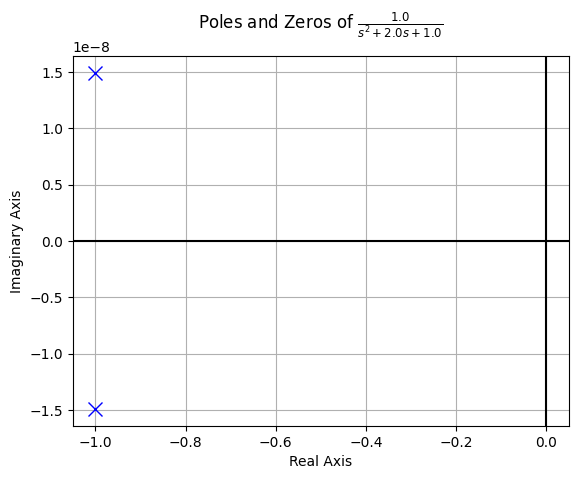

In [21]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

***Diagrama de Bode***

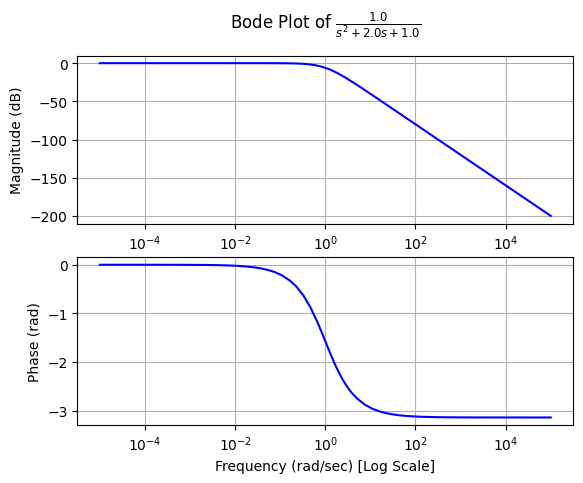

In [22]:
bode_plot(tf1)

***Respuesta impulso***

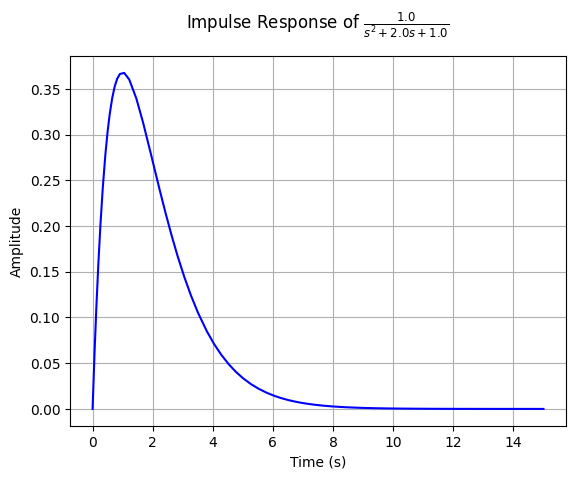

In [23]:
impulse_response_plot(tf1,upper_limit=15/(xi.subs(mck)*wn.subs(mck)))

***Respuesta escalón***

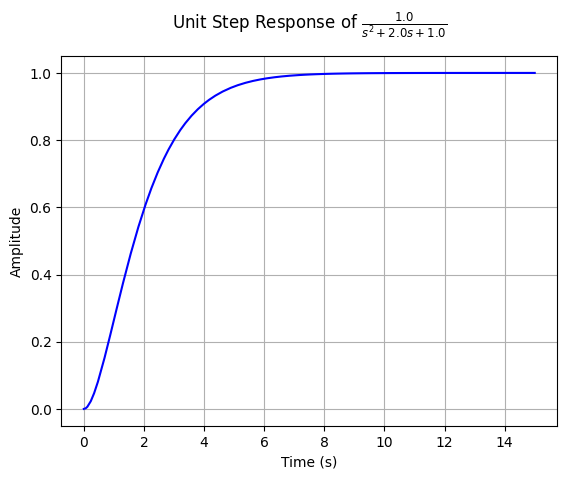

In [24]:
step_response_plot(tf1,upper_limit=15/(xi.subs(mck)*wn.subs(mck)))

***Respuesta rampa***

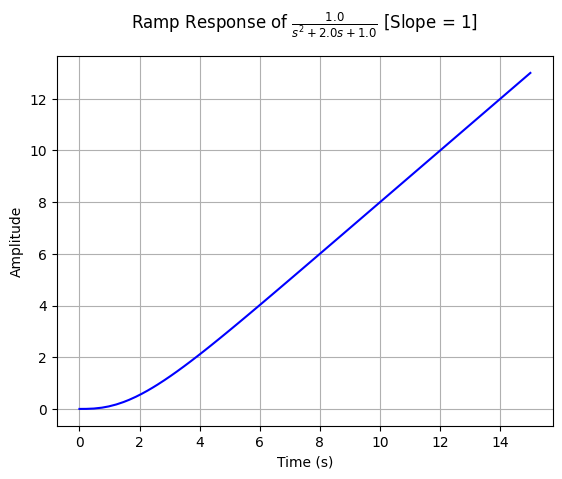

In [25]:
import sympy.physics.control as control
control.ramp_response_plot(tf1,upper_limit=15/(xi.subs(mck)*wn.subs(mck)))

# Para lazo cerrado

In [26]:
# FUNCIÓN DE TRANSFERENCIA PARA LAZO CERRADO
H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)
Hlc = H/(1+H) #para lazo cerrado
Hlc_s=sym.simplify(Hlc)
Hlc_s

        1         
──────────────────
             2    
c⋅s + k + m⋅s  + 1

## Para Sistema subamortiguado

In [27]:
pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 5.4 MB/s eta 0:00:00


In [28]:
import sympy as sym
import control
import numpy as np

# Tus variables
s = sym.symbols('s')
Ko = 1  # Asume algún valor para Ko
wn = 0.5  # Asume algún valor para wn
xi = 0.25  # Asume algún valor para xi


# FUNCIÓN DE TRANSFERENCIA PARA LAZO CERRADO
#forma canónica del slit
H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)
Hlc = H/(1+H)  # para lazo cerrado
Hlc_simplified = sym.simplify(Hlc)

# Convertir a función de transferencia
num, den = sym.fraction(Hlc_simplified)  # Obtener numerador y denominador
num = sym.Poly(num, s).all_coeffs()  # Coeficientes del numerador
den = sym.Poly(den, s).all_coeffs()  # Coeficientes del denominador
num = [float(coeff) for coeff in num]  # Convertir a flotante
den = [float(coeff) for coeff in den]  # Convertir a flotante
tf = control.TransferFunction(num, den)

# Obtener los ceros y polos
ceros = control.zero(tf)
polos = control.pole(tf)

print("Ceros:", ceros)
print("Polos:", polos)

Ceros: []
Polos: [-0.125+0.69597055j -0.125-0.69597055j]


***Polos y ceros***

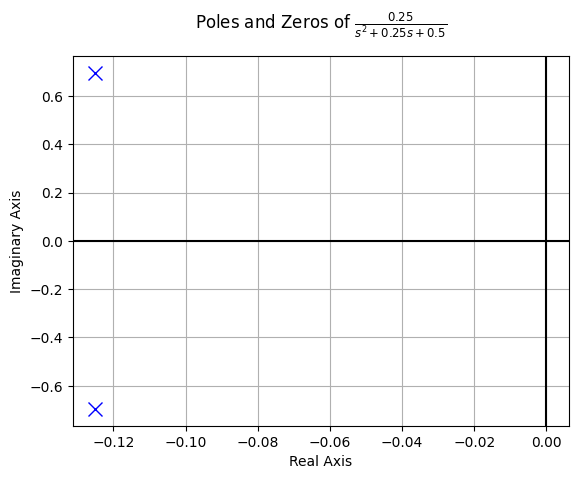

In [29]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(Hlc_simplified.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

***Diagrama de bode***

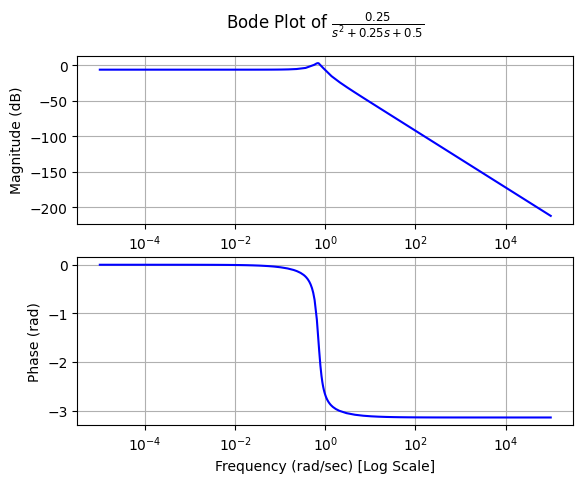

In [30]:
bode_plot(tf1)

***Respuesta impulso***

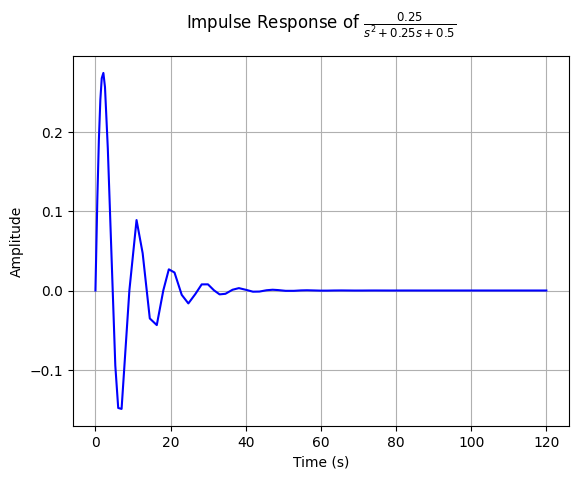

In [31]:
impulse_response_plot(tf1,upper_limit=15/(0.25*0.5))

***Respuesta escalón***

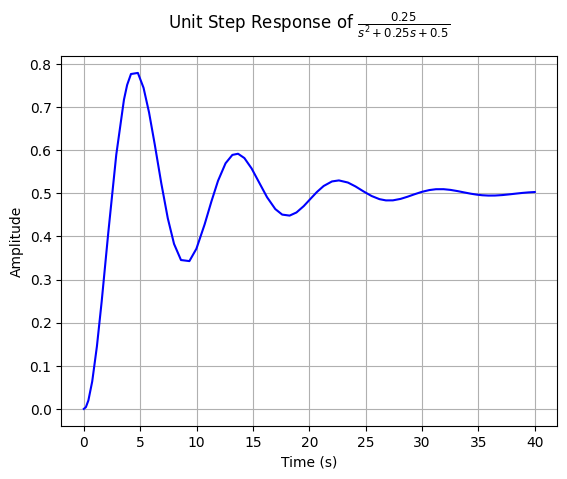

In [32]:
step_response_plot(tf1,upper_limit=5/(0.25*0.5))

***Respuesta Rampa***

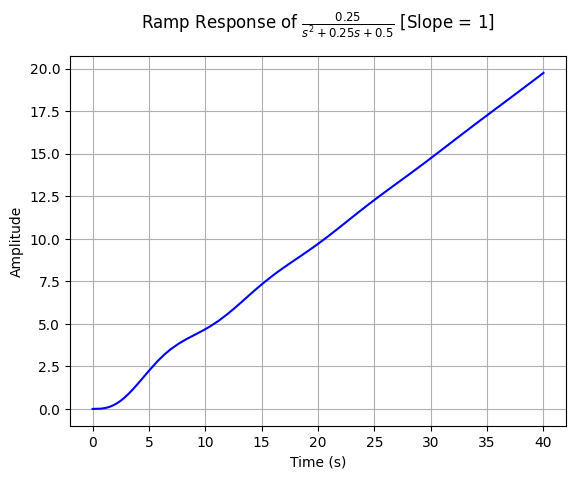

In [33]:
import sympy.physics.control as control
control.ramp_response_plot(tf1,upper_limit=5/(0.25*0.5))

## Para sistema sobreamortiguado

In [34]:
import control
s = sym.symbols('s')
Ko = 1  # Asume algún valor para Ko
wn = 0.7  # Asume algún valor para wn
xi = 1.41  # Asume algún valor para xi


# FUNCIÓN DE TRANSFERENCIA PARA LAZO CERRADO
#forma canónica del slit
H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)
Hlc = H/(1+H)  # para lazo cerrado
Hlc_simplified = sym.simplify(Hlc)

# Convertir a función de transferencia
num, den = sym.fraction(Hlc_simplified)  # Obtener numerador y denominador
num = sym.Poly(num, s).all_coeffs()  # Coeficientes del numerador
den = sym.Poly(den, s).all_coeffs()  # Coeficientes del denominador
num = [float(coeff) for coeff in num]  # Convertir a flotante
den = [float(coeff) for coeff in den]  # Convertir a flotante
tf = control.TransferFunction(num, den)

# Obtener los ceros y polos
ceros = control.zero(tf)
polos = control.pole(tf)

print("Ceros:", ceros)
print("Polos:", polos)

Ceros: []
Polos: [-0.987+0.07636098j -0.987-0.07636098j]


***Polos y ceros***

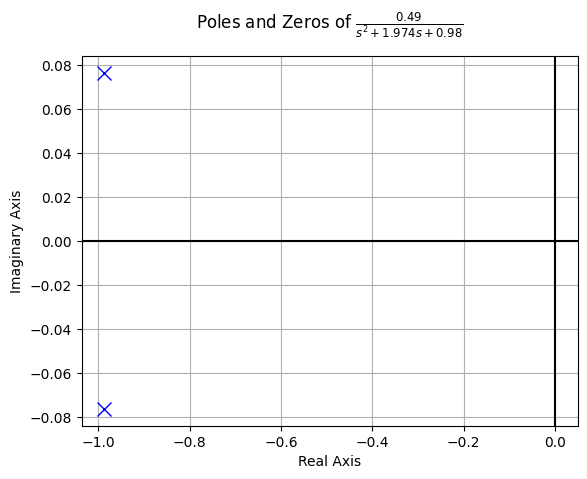

In [35]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(Hlc_simplified.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

***Diagrama de bode***

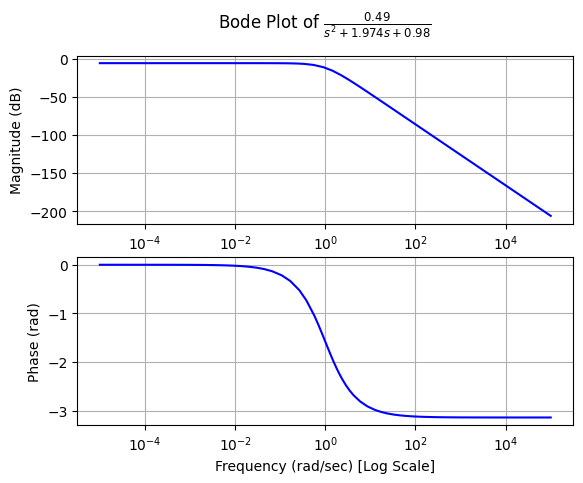

In [36]:
bode_plot(tf1)

***Respuesta impulso***

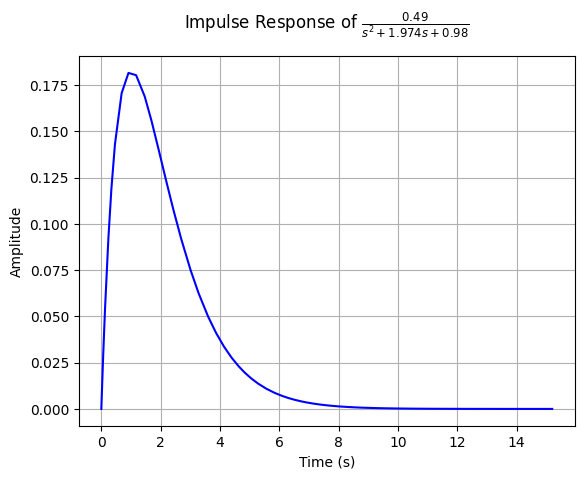

In [37]:
impulse_response_plot(tf1,upper_limit=15/(1.41*0.7))

***Respuesta escalón***

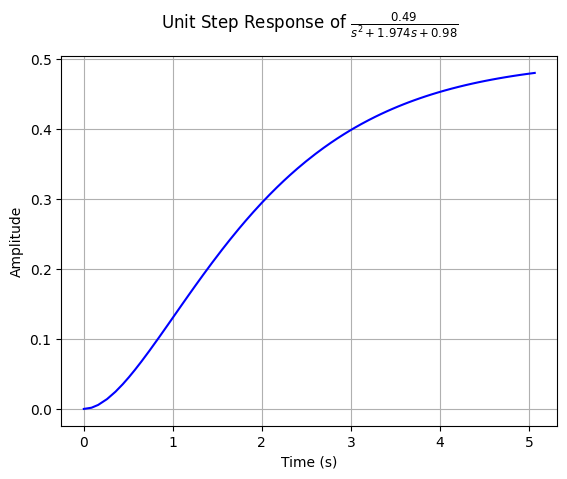

In [38]:
step_response_plot(tf1,upper_limit=5/(1.41*0.7))

***Respuesta rampa***

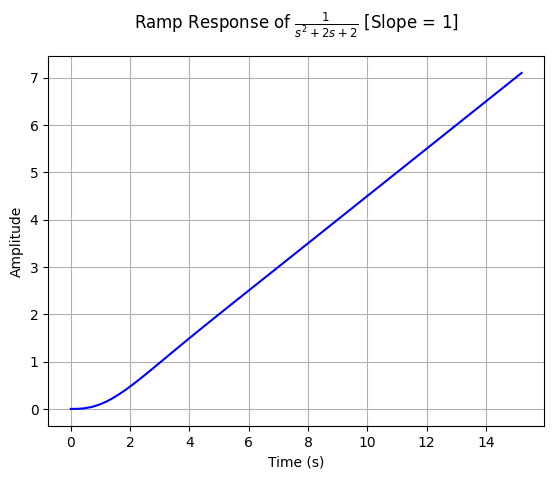

In [48]:
import sympy.physics.control as control
control.ramp_response_plot(tf1,upper_limit=15/(1.41*0.7))

## Para sistema critícamente amortiguado

In [41]:
import control
s = sym.symbols('s')
Ko = 1  # Asume algún valor para Ko
wn = 1  # Asume algún valor para wn
xi = 1  # Asume algún valor para xi


# FUNCIÓN DE TRANSFERENCIA PARA LAZO CERRADO
#forma canónica del slit
H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)
Hlc = H/(1+H)  # para lazo cerrado
Hlc_simplified = sym.simplify(Hlc)

# Convertir a función de transferencia
num, den = sym.fraction(Hlc_simplified)  # Obtener numerador y denominador
num = sym.Poly(num, s).all_coeffs()  # Coeficientes del numerador
den = sym.Poly(den, s).all_coeffs()  # Coeficientes del denominador
num = [float(coeff) for coeff in num]  # Convertir a flotante
den = [float(coeff) for coeff in den]  # Convertir a flotante
tf = control.TransferFunction(num, den)

# Obtener los ceros y polos
ceros = control.zero(tf)
polos = control.pole(tf)

print("Ceros:", ceros)
print("Polos:", polos)

Ceros: []
Polos: [-1.+1.j -1.-1.j]


***Polos y ceros***

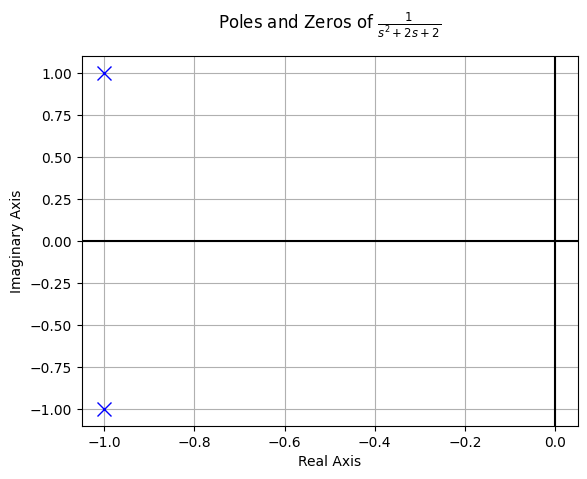

In [42]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(Hlc_simplified.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

***Diagrama de bode***

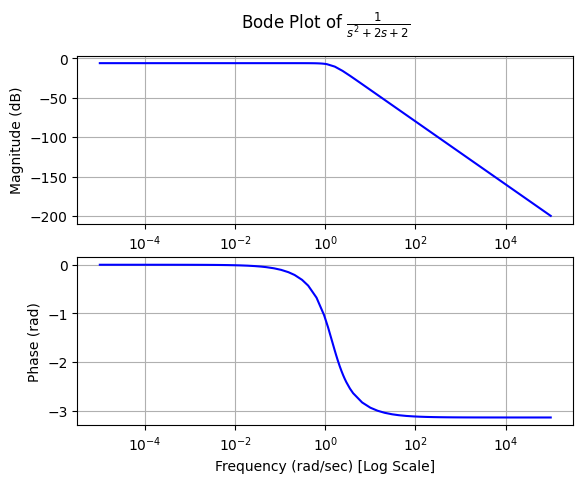

In [43]:
bode_plot(tf1)

***Respuesta impulso***

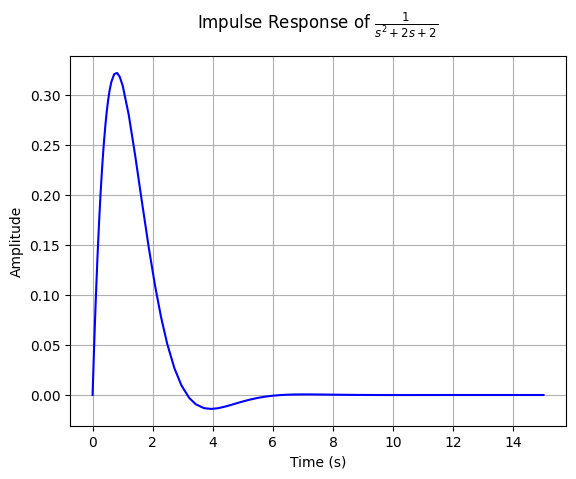

In [44]:
impulse_response_plot(tf1,upper_limit=15/(1*1))

***Respuesta escalón***

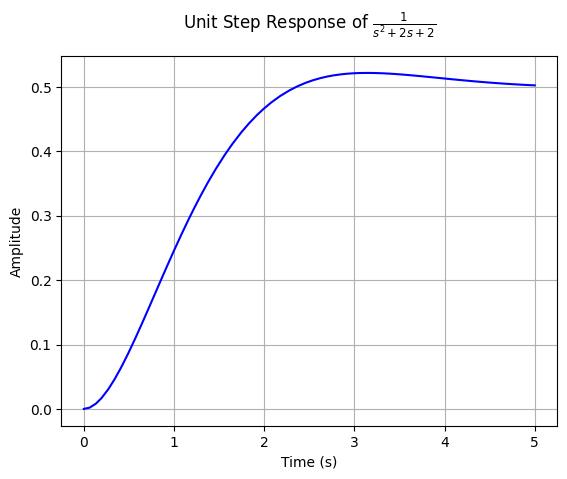

In [45]:
step_response_plot(tf1,upper_limit=5/(1*1))

***Respuesta rampa***

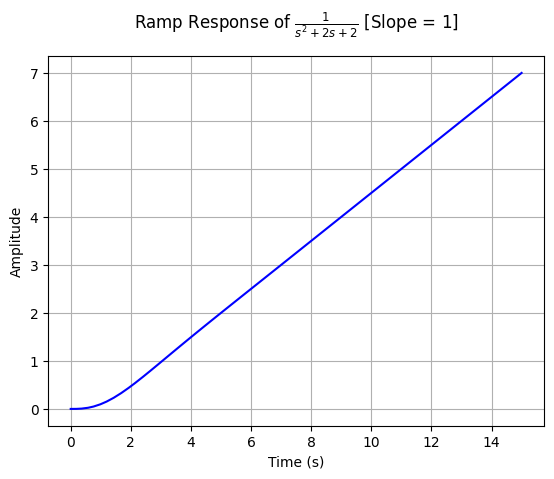

In [46]:
import sympy.physics.control as control
control.ramp_response_plot(tf1,upper_limit=15/(1*1))

# **Punto 2**

In [49]:
# LIBRERÍAS

import soundfile as sf
import scipy
import numpy as np


from scipy.signal import butter
from scipy.signal import cheby1
from scipy.signal import cheby2
from scipy.signal import bessel
from scipy.signal import ellip
from scipy.signal import firwin
from scipy.signal import lfilter, filtfilt
from scipy.signal import freqz_zpk
from IPython.display import Markdown as md
from IPython.display import Audio
from matplotlib import pyplot as plt
from matplotlib.patches import Circle

In [50]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 7.8 MB/s eta 0:00:00
  Created wh

In [51]:
# Realizamos un programa para comenzar a descargar la canción dónde se leerá el link y el nombre de esta

import os
import yt_dlp as youtube_dl
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

In [52]:
link_= ["https://www.youtube.com/watch?v=mN_UkDluO6M"]
name_ = ['Muy demalas - Darío Gómez'
        ]
for name,link in zip(name_,link_):
    print(name)
    download_ytvid_as_mp3(link,name)

Muy demalas - Darío Gómez
[youtube] Extracting URL: https://www.youtube.com/watch?v=mN_UkDluO6M
[youtube] mN_UkDluO6M: Downloading webpage
[youtube] mN_UkDluO6M: Downloading ios player API JSON
[youtube] mN_UkDluO6M: Downloading android player API JSON
[youtube] mN_UkDluO6M: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=mN_UkDluO6M
[youtube] mN_UkDluO6M: Downloading webpage
[youtube] mN_UkDluO6M: Downloading ios player API JSON
[youtube] mN_UkDluO6M: Downloading android player API JSON
[youtube] mN_UkDluO6M: Downloading m3u8 information
[info] mN_UkDluO6M: Downloading 1 format(s): 251
[download] Destination: Muy demalas - Darío Gómez.mp3
[download] 100% of    3.22MiB in 00:00:00 at 5.78MiB/s   
Download complete... Muy demalas - Darío Gómez.mp3


In [53]:
# Instalamos la extensión soundfile
!pip install soundfile

In [54]:
import subprocess

for name in name_:
    subprocess.call(['ffmpeg','-y', '-i', name+'.mp3',
                   name+'.wav'])

In [55]:
import soundfile as sf # para instalar pip install soundfile
for name in name_:
    nombre_out = "output.wav"
    x, fs = sf.read(name+'.wav')

    print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,name+'.wav'))

print('Frecuencia de muestreo %.2f[Hz]' %(fs))
xpro = x.copy()


inicial = int(input("Ingrese el tiempo inicial de la canción: "))
final = int(input("Ingrese el tiempo inicial de la canción: "))

corte1 = 14950 # int(input("Ingrese la frecuencia de corte inferior para el filtro pasa bandas")) NOTA: En caso de querer que el usuario ingrese la frecuencia de corte dejar estas dos líneas de código que están comentadas
corte2 = 25000 # int(input("Ingrese la frecuencia de corte superior para el filtro pasa bandas"))       Para este caso se deja la frecuencia de corte 1 en 14950 que es menor a Fo para que se pueda denotar el efecto del pasabajas en cada filtro

ti = inicial
tf = final
xs = xpro[int(ti*fs):int((tf*fs)),:]
K= int(len(xs)/2) + 1
print(f'Audio original:')
Audio([xs[:,1], xs[:,0]],rate=fs) #segmento de audio

Frecuencia de muestreo 48000.00[Hz]
audio Muy demalas - Darío Gómez.wav
Frecuencia de muestreo 48000.00[Hz]
Ingrese el tiempo inicial de la canción20
Ingrese el tiempo inicial de la canción25
Ingrese la frecuencia de corte inferior para el filtro pasa bandas14950
Ingrese la frecuencia de corte superior para el filtro pasa bandas25000
Audio original:


## Modulación

In [56]:
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

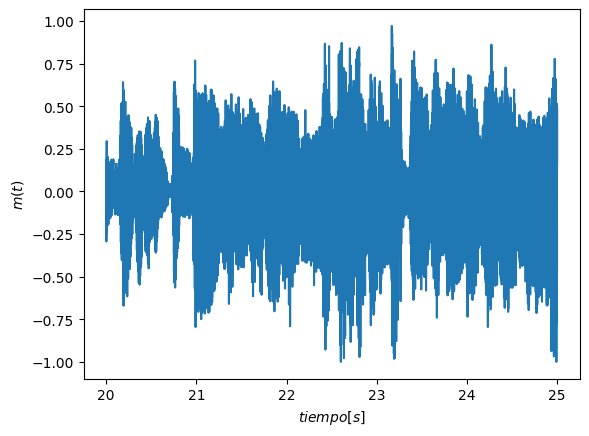

In [57]:
#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m(t)$')
plt.show()

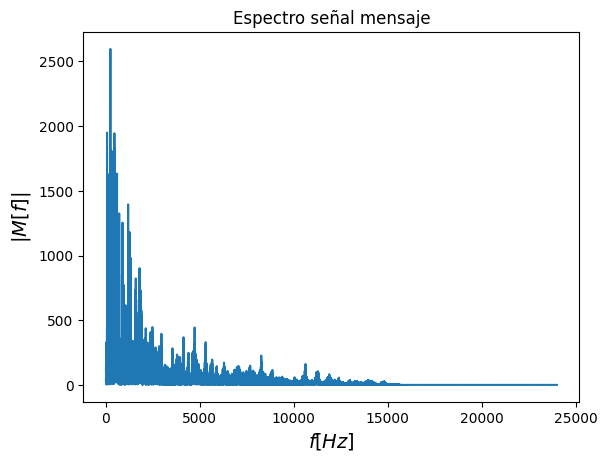

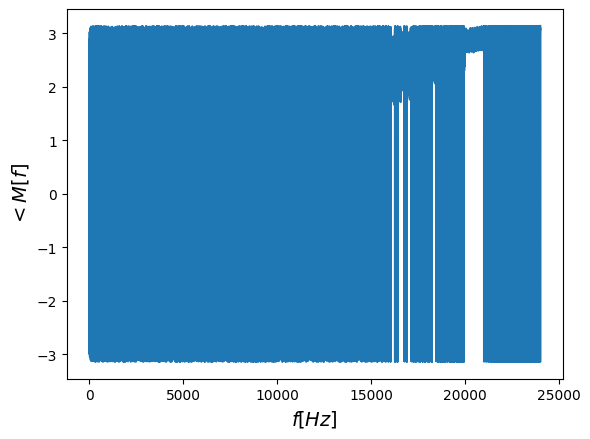

In [58]:
#Fourier señal mensaje
Mw = np.fft.rfft(m) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Mw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M[f]$',fontsize = 14)
plt.show()

 Para que se cumpla nyquist  $$F_o > F_{max}$$ \\

 para nuestro caso: $$F_o=15000 [Hz]$$



In [59]:
Fo = 15000 #frecuencia portadora
c = np.cos(2*np.pi*Fo*tt) #portadora

In [60]:
#repoducir portadora
Audio(c,rate=fs)

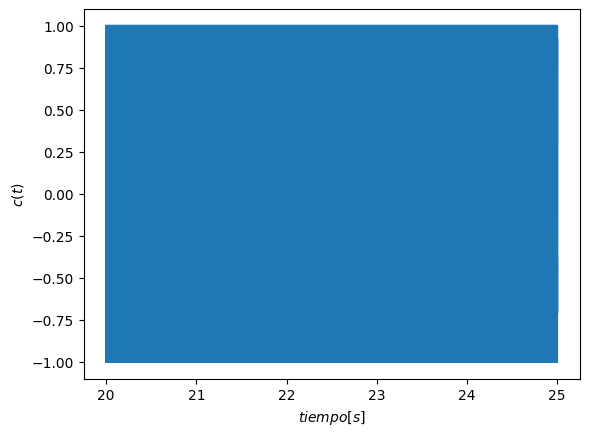

In [61]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$c(t)$')
plt.show()

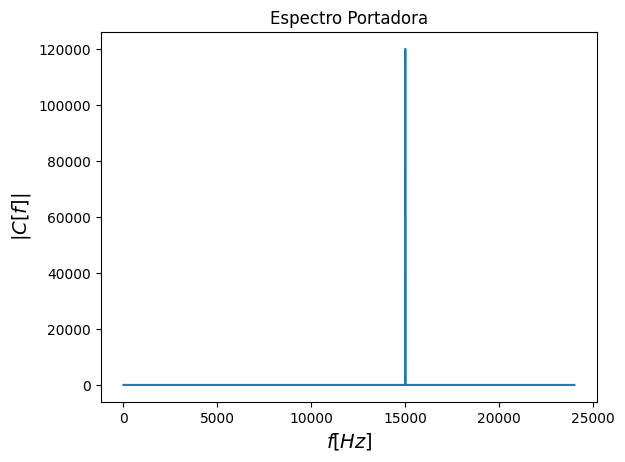

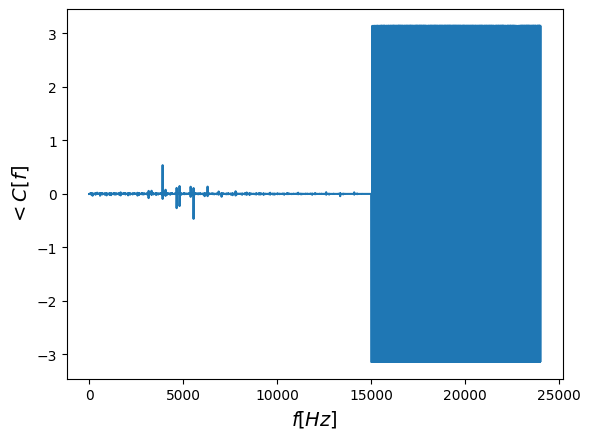

In [62]:
#Fourier señal portadora
Cw = np.fft.rfft(c) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Cw))#se grafica la magnitud
plt.title(r'Espectro Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|C[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Cw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<C[f]$',fontsize = 14)
plt.show()

In [63]:
#señal modulada
A1 = 2
y = A1*m*c #señal modulada en AM

In [64]:
#repoducir modulada
Audio(y,rate=fs)

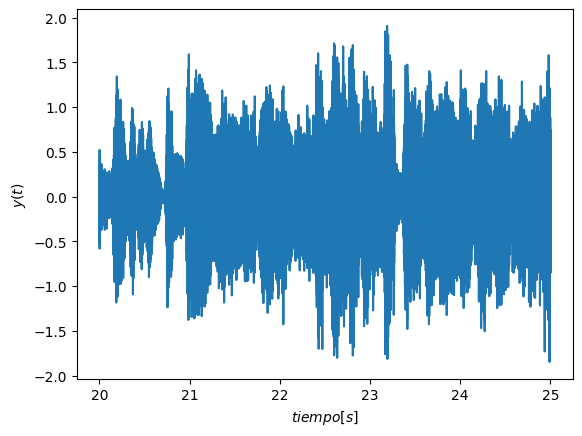

In [65]:
# Señal modulada en tiempo y frecuencia
plt.plot(tt,y) #graficar señal modulada en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

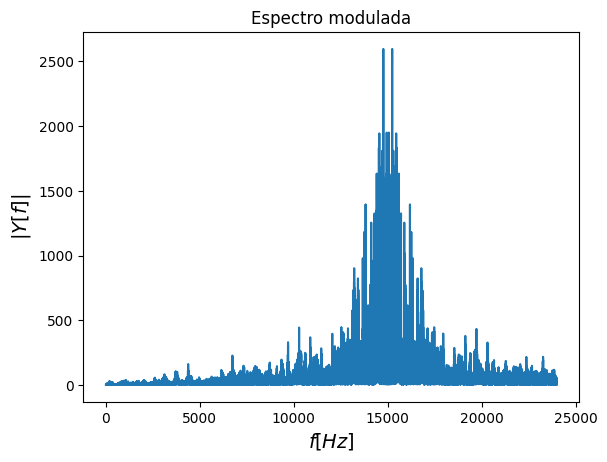

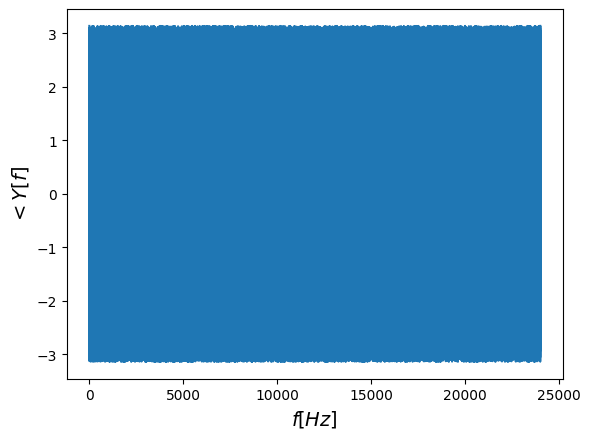

In [66]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Yw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<Y[f]$',fontsize = 14)
plt.show()

## Demodulación

In [67]:
d = y*c #señal demodulada

#repoducir señal demodulada
Audio(d,rate=fs)

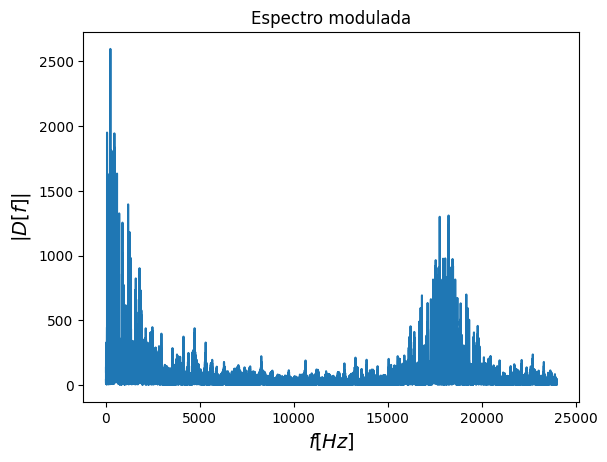

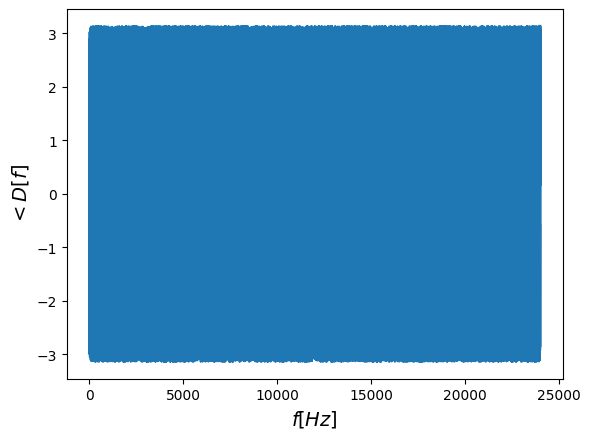

In [68]:
#Fourier señal demodulada
Dw = np.fft.rfft(d) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Dw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|D[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Dw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<D[f]$',fontsize = 14)
plt.show()

## Filtrado de la señal

***Filtro Butterworth***

In [69]:
#Filtro Butterworth
print("Escriba el tipo de filtrado que desea hacer según las siguientes instrucciones")
print("Filtrado paso bajo: lowpass",
      "Filtrado paso alto: highpass",
      "Filtrado pasa banda: bandpass"
      "Filtrado rechaza banda: bandstop")

filtrado = str(input("Ingrese el nombre del tipo de filtrado tal como se indica en la tabla: "))
N_orden= int(input("Ingrese el orden del filtro: "))

if filtrado=='highpass' or filtrado=='lowpass':
  wn=corte1
elif filtrado=='bandpass' or filtrado=='bandstop':
  wn=[corte1,corte2]

num, den = butter(N_orden, Wn=wn, btype=filtrado, output='ba',fs=fs)

xf = filtfilt(num, den, xs, axis=0)
print('Audio filtrado')
Audio([xf[:,1], xf[:,0]],rate=fs)

Escriba el tipo de filtrado que desea hacer según las siguientes instrucciones
Filtrado paso bajo: lowpass Filtrado paso alto: highpass Filtrado pasa banda: bandpassFiltrado rechaza banda: bandstop
Ingrese el nombre del tipo de filtrado tal como se indica en la tabla: lowpass
Ingrese el orden del filtro: 10
Audio filtrado


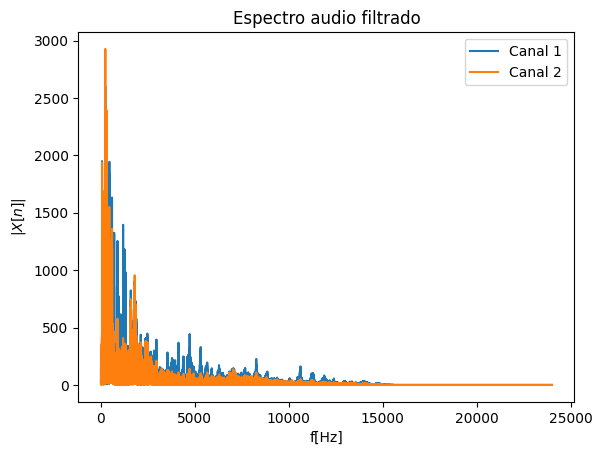

In [70]:
#Espectro con el filtro

xpro = xf.copy()
Xw = np.fft.rfft(xpro,axis=0) # fft por cada columna de xpro
vf = np.fft.rfftfreq(np.size(xpro,0),1/fs)
plt.plot(vf,abs(Xw))
plt.legend(('Canal 1','Canal 2'))
plt.title(r'Espectro audio filtrado')
plt.xlabel(r'f[Hz]')
plt.ylabel(r'$|X[n]|$')
plt.show()

***Filtro Chebyshev I***

In [71]:
# Filtro Chebyshev I
print("Escriba el tipo de filtrado que desea hacer según las siguientes instrucciones")
print("Filtrado paso bajo: lowpass",
      "Filtrado paso alto: highpass",
      "Filtrado pasa banda: bandpass"
      "Filtrado rechaza banda: bandstop")

filtrado = str(input("Ingrese el nombre del tipo de filtrado tal como se indica en la tabla: "))
N_orden = int(input("Ingrese el orden del filtro: "))
ripple = int(input("Ingrese el orden ripple del filtro: "))

if filtrado=='highpass' or filtrado=='lowpass':
  wn=corte1
elif filtrado=='bandpass' or filtrado=='bandstop':
  wn=[corte1,corte2]

num, den=cheby1(N_orden, rp=ripple, Wn=wn, btype=filtrado, output='ba', fs=fs)

xf = filtfilt(num, den, xs, axis=0)
print('Audio filtrado')
Audio([xf[:,1], xf[:,0]],rate=fs)

Escriba el tipo de filtrado que desea hacer según las siguientes instrucciones
Filtrado paso bajo: lowpass Filtrado paso alto: highpass Filtrado pasa banda: bandpassFiltrado rechaza banda: bandstop
Ingrese el nombre del tipo de filtrado tal como se indica en la tabla: lowpass
Ingrese el orden del filtro: 10
Ingrese el orden ripple del filtro: 5
Audio filtrado


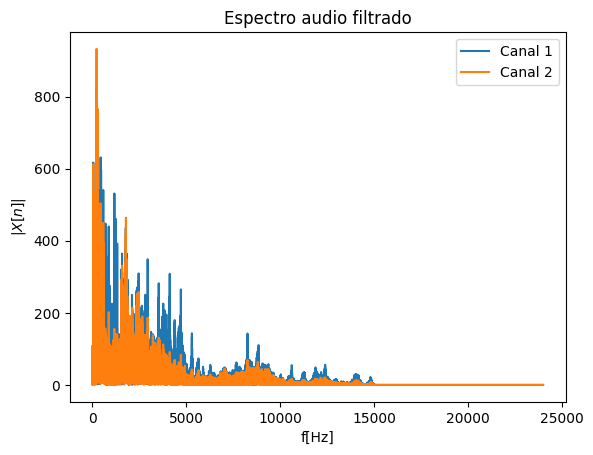

In [72]:
#Espectro con el filtro

xpro = xf.copy()
Xw = np.fft.rfft(xpro,axis=0)
vf = np.fft.rfftfreq(np.size(xpro,0),1/fs)
plt.plot(vf,abs(Xw))
plt.legend(('Canal 1','Canal 2'))
plt.title(r'Espectro audio filtrado')
plt.xlabel(r'f[Hz]')
plt.ylabel(r'$|X[n]|$')
plt.show()

***Filtro

In [73]:
#Filtro Bessel
print("Escriba el tipo de filtrado que desea hacer según las siguientes instrucciones")
print("Filtrado paso bajo: lowpass",
      "Filtrado paso alto: highpass",
      "Filtrado pasa banda: bandpass"
      "Filtrado rechaza banda: bandstop")

filtrado = str(input("Ingrese el nombre del tipo de filtrado tal como se indica en la tabla: "))
N_orden = int(input("Ingrese el orden del filtro: "))
normali="mag"

if filtrado=='highpass' or filtrado=='lowpass':
  wn=corte1
if filtrado=='bandpass' or filtrado=='bandstop':
  wn=[corte1,corte2]
num, den = bessel(N_orden, wn, btype=filtrado, output='ba', norm = normali, fs=fs)

xf = filtfilt(num, den, xs, axis=0)
print('Audio filtrado:')
Audio([xf[:,1], xf[:,0]],rate=fs)

Escriba el tipo de filtrado que desea hacer según las siguientes instrucciones
Filtrado paso bajo: lowpass Filtrado paso alto: highpass Filtrado pasa banda: bandpassFiltrado rechaza banda: bandstop
Ingrese el nombre del tipo de filtrado tal como se indica en la tablalowpass
Ingrese el orden del filtro5
Audio filtrado:


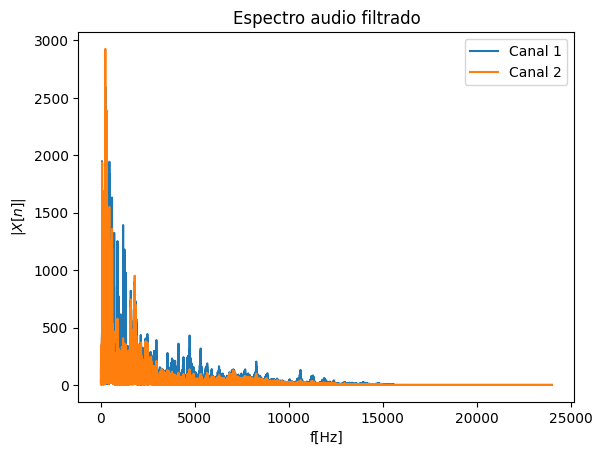

In [74]:
#Espectro con el filtro

xpro = xf.copy()
Xw = np.fft.rfft(xpro,axis=0)
vf = np.fft.rfftfreq(np.size(xpro,0),1/fs)
plt.plot(vf,abs(Xw))
plt.legend(('Canal 1','Canal 2'))
plt.title(r'Espectro audio filtrado')
plt.xlabel(r'f[Hz]')
plt.ylabel(r'$|X[n]|$')
plt.show()